# Custom Spectrum
In this example we show how to use a custom input spectrum for a simulated planet rather than an auto-generated blackbody spectrum.
A custom spectrum can be loaded from a txt file that contains two columns, the first one containing the wavelengths in microns (um) and the second one containing the
flux values in W/sr/m2/um. An example file that has been generated with NASA èSG can be found [here](../_static/psg_earth_spectrum.txt). An `InputSpectrum`object can then be created as:


In [1]:
from pathlib import Path

from phringe.util.spectrum import InputSpectrum

input_spectrum = InputSpectrum(path_to_spectrum=Path('../_static/psg_earth_spectrum.txt'))

and passed to a `Planet` object as follows:

In [2]:
from phringe.core.entities.sources.planet import Planet

earth_twin = Planet(
    name='Earth Twin',
    has_orbital_motion=False,
    mass='1 Mearth',
    radius='1 Rearth',
    temperature='254 K',
    semi_major_axis='1 au',
    eccentricity='0',
    inclination='0 deg',
    raan='90 deg',
    argument_of_periapsis='0 deg',
    true_anomaly='45 deg',
    input_spectrum=input_spectrum,  # if None a blackbody spectrum will be created,
    host_star_distance='10 pc',
    host_star_mass='1 Msun',
)

Once wa have set up the pipeline using the `SetupModule` the spectrum is created from the file and we can have a look at it:

Loading configuration...
Done


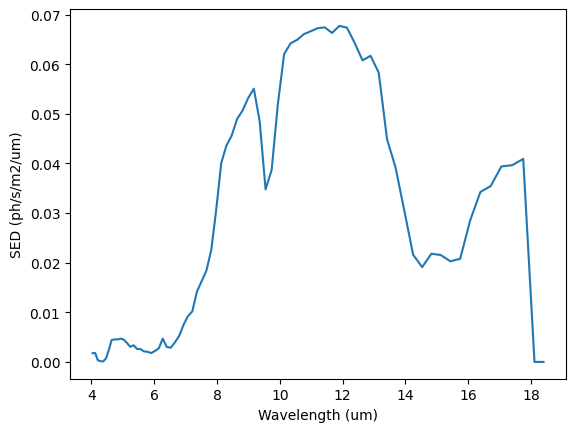

In [4]:

from matplotlib import pyplot as plt
from lifesimmc.core.modules.loading.setup_module import SetupModule
from lifesimmc.core.pipeline import Pipeline
from lifesimmc.lib.observation import LIFEReferenceObservation
from lifesimmc.lib.instrument import LIFEReferenceDesign, InstrumentalNoise
from phringe.core.entities.scene import Scene

# Create scene and add planet
scene = Scene()
scene.add_source(earth_twin)

# Create instrument and observation
inst = LIFEReferenceDesign(instrumental_noise=InstrumentalNoise.NONE)
obs = LIFEReferenceObservation(
    total_integration_time='10 d',
    detector_integration_time='0.05 d',
    optimized_star_separation='0.1 arcsec'
)

# Create pipeline and add setup module
pipeline = Pipeline()
module = SetupModule(
    n_setup_out='setup',
    n_planet_params_out='params_init',
    instrument=inst,
    observation=obs,
    scene=scene
)
pipeline.add_module(module)

# Run pipeline
pipeline.run()

# Get planet parameter resource
params_init = pipeline.get_resource('params_init')

# Get SED and wavelengths and plot them
sed = params_init.params[0].sed / 10e6  # Convert to right units
wavelengths = params_init.params[0].sed_wavelength_bin_centers * 1e6  # Convert to um

plt.plot(wavelengths, sed)
plt.xlabel('Wavelength (um)')
plt.ylabel('SED (ph/s/m2/um)')
plt.show()